<a href="https://colab.research.google.com/github/pravali96/PortfolioProjects/blob/main/HR_Data_Analytics_%5BProfiling%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Setting
A company that is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses conducted by the company. Many people signup for their training. The company wants to know which of these candidates want to work for the company after training if not looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. 

The two main goals in this report are - Classification and Profiling. 
The goal of classification is to accurately predict the target class for each case in the data i.e., whether a candidate is staying or leaving the organization. Profiling is to find distinguishing factors between records in different classes in terms of their predictor variables, or “predictor profile”. The main purpose of Profiling is to re-iterate some interesting findings that can be used when going further and choosing candidates.



# Data Visualization

In [234]:
#Importing Libraries
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, roc_auc_score, roc_curve

In [103]:
#Importing File
from google.colab import files
uploaded = files.upload()
df= pd.read_csv(io.BytesIO(uploaded['aug_train.csv']))

Saving aug_train.csv to aug_train (3).csv


Data Visualization, Exploration

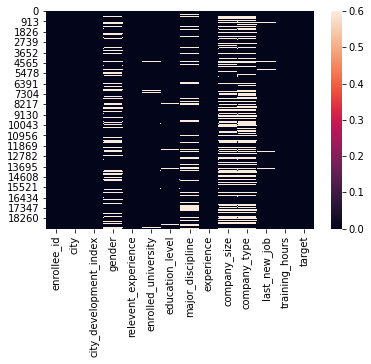

In [104]:
# Heatmap of null values. Too many null values in company_size and company_type
sns.color_palette("Set2")
sns.set_palette("Set2")
sns.heatmap(df.isnull(),vmax=0.6,square=False)

In [105]:
#Counting Null values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [106]:
df["target"].replace({0: "Not looking for job change", 1: "Looking for job change"}, inplace=True)

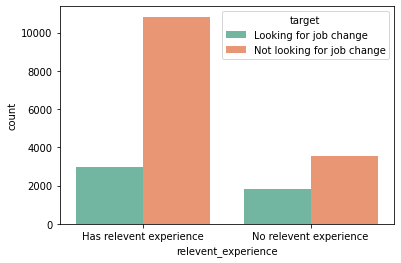

In [107]:
# Relevent Experience vs change of job
df['relevent_experience'].value_counts()
sns.countplot(x=df['relevent_experience'], hue=df['target']) 
#Experience plays a role, People with no relevant experience are most likely to leave

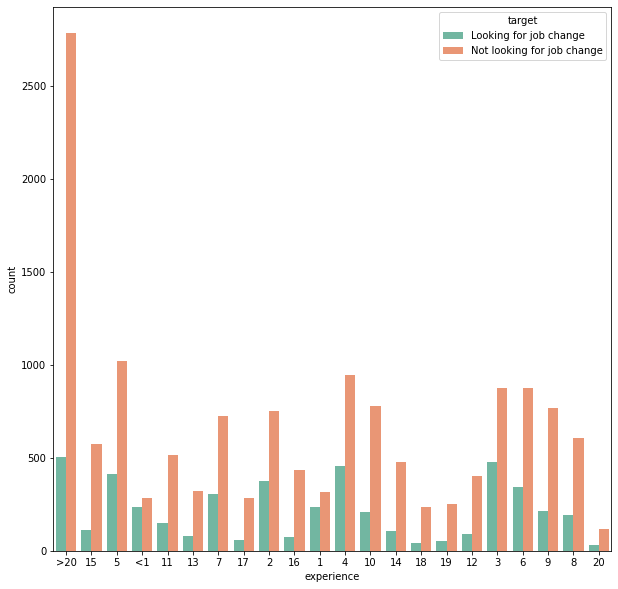

In [108]:
# Experience vs change of job
plt.figure(figsize=(10,10))
sns.countplot(x=df['experience'], hue=df['target'] ) 
# People with 1 year and less than 1 year experience are more likely to leave.

education_level,Graduate,High School,Masters,Phd,Primary School
target,,,,,
Looking for job change,3245,394,935,58,41
Not looking for job change,8353,1623,3426,356,267


<Figure size 1440x720 with 0 Axes>

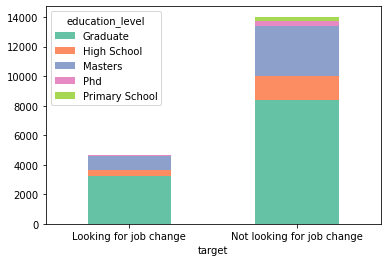

In [109]:
# Education Level vs change of job
plt.figure(figsize=(20,10))
ed_level = df.groupby(['target', 'education_level'])['target'].count().unstack('education_level').fillna(0)
ed_level.plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)
ed_level
# Most of the candidates that are looking for chnage of job are Graduates and Post Graduates

enrolled_university,Full time course,Part time course,no_enrollment
target,,,
Looking for job change,1431,302,2921
Not looking for job change,2326,896,10896


<Figure size 1440x720 with 0 Axes>

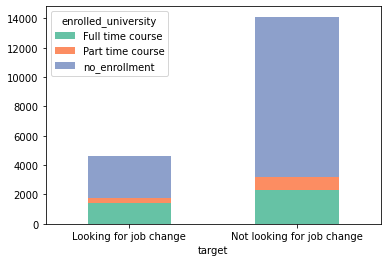

In [110]:
# University enrollement vs change of job
plt.figure(figsize=(20,10))
enrolled_univ = df.groupby(['target', 'enrolled_university'])['target'].count().unstack('enrolled_university').fillna(0)
enrolled_univ.plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)
enrolled_univ
# Full time univerisity enrolled employees have a higher chnace of looking a job change

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
target,,,,,,
Looking for job change,53,86,141,55,102,3791
Not looking for job change,200,241,528,168,279,10701


<Figure size 1440x720 with 0 Axes>

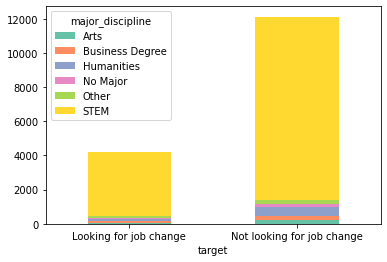

In [111]:
# Major Discipline vs change of job
plt.figure(figsize=(20,10))
maj_disc = df.groupby(['target', 'major_discipline'])['target'].count().unstack('major_discipline').fillna(0)
maj_disc.plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)
maj_disc

6140


company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
target,,,,,,
Looking for job change,142,140,97,29,210,1775
Not looking for job change,461,861,424,92,745,8042


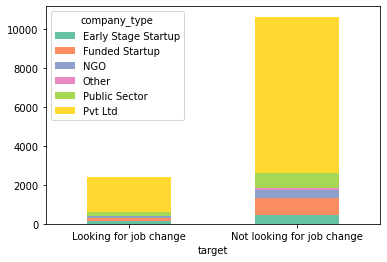

In [112]:
df['company_type'].value_counts()
print(df['company_type'].isnull().sum()) 
#More than 25% of the values in this column are null
comp_type = df.groupby(['target', 'company_type'])['target'].count().unstack('company_type').fillna(0)
comp_type.plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)
comp_type

5938


company_size,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
target,,,,,,,,
Looking for job change,344,415,200,385,545,152,102,224
Not looking for job change,1127,2156,1128,1634,2538,725,461,1084


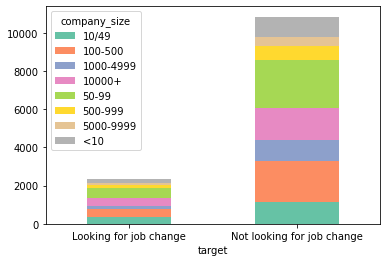

In [113]:
# Company Size vs change of job
df['company_size'].value_counts() 
print(df['company_size'].isnull().sum()) #almost 25% of the values in this column are null
comp_size = df.groupby(['target', 'company_size'])['target'].count().unstack('company_size').fillna(0)
comp_size.plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)

comp_size

In [114]:
# checking relations between 'last new job' and 'experience' 
# As candiadates who did not have last new job are having an experience.
df['last_new_job'].value_counts()
never_worked=df['last_new_job']=='never'
df1=df[never_worked]
df1['target'].value_counts()
# 1/3rd of the candidates who never had a last job but have experience in the same company are looking a change of job

Not looking for job change    1713
Looking for job change         739
Name: target, dtype: int64

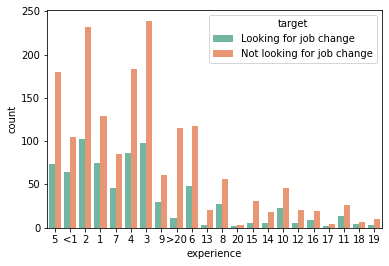

In [115]:
df[never_worked]['experience'].value_counts()
sns.countplot(x=df[never_worked]['experience'], hue=df['target']) 
#Looking to see if candiadates with 'never' in last new job are more likely to stay

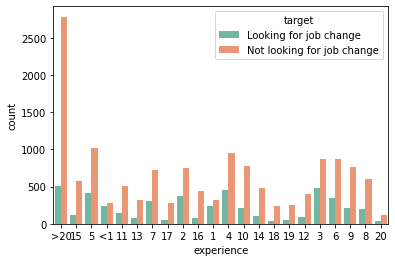

In [116]:
# Experience vs change of job
sns.countplot(x=df['experience'], hue=df['target'] ) 
# Candidates with less experience are likely to look for a new job

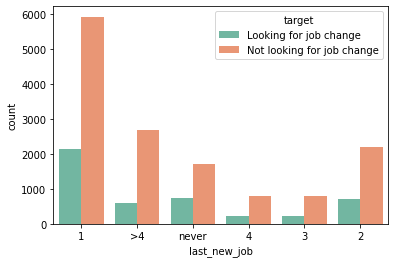

In [117]:
#last new job vs change of job
df['last_new_job'].value_counts()
sns.countplot(x=df['last_new_job'], hue=df['target'])

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


<Figure size 2160x720 with 0 Axes>

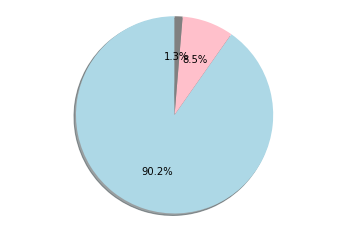

In [118]:
# Visualizing Gender
plt.figure(figsize=(30,10))
gender_counts=df['gender'].value_counts()
print(gender_counts)
fig1, ax1 = plt.subplots()
colors = ['lightblue', 'pink', 'grey']
ax1.pie(gender_counts, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax1.axis('equal') 
plt.show() 

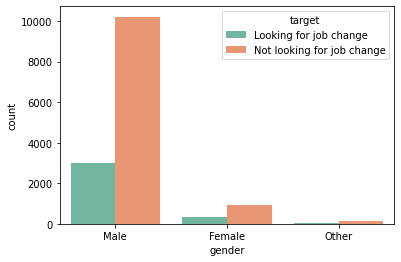

In [119]:
# Most of the candidates in the given data are men
# Gender vs change of job
sns.countplot(x=df['gender'], hue=df['target'])  

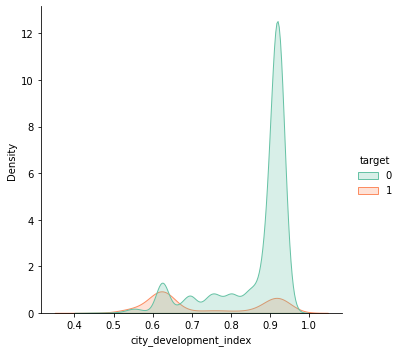

In [177]:
sns.displot(df, x="city_development_index", hue="target", kind="kde", fill=True)
# Candidates from lower city development index are more likely to look for change of jobs

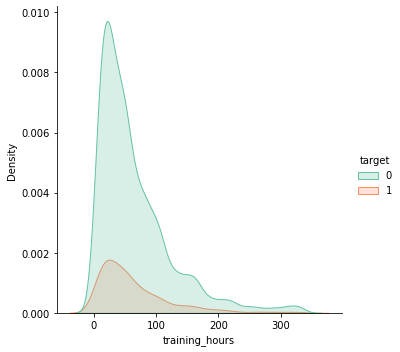

In [178]:
sns.displot(df, x="training_hours", hue="target", kind="kde", fill=True)

In [120]:
df["target"].replace({ "Not looking for job change":0, "Looking for job change": 1}, inplace=True)

Handling Missing Data
Deleting Company_type as it has 32% null values
CityNumber(using city development index instead) and Enrollee_id are not very useful for the analysis

In [121]:
del df['city'] #Considering city_developement_index instead
del df['enrollee_id'] # Not related to attrition rate
del df['company_type'] # Too many null values

In [122]:
df['target'].value_counts()

0    14381
1     4777
Name: target, dtype: int64

In [123]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,>4,47,0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,never,83,0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,never,52,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,4,8,0


# Preprocessing Data

In [124]:
df["last_new_job"].replace({"1": "1", "2": "2", "3":"3", "4":"4", ">4":"5","never":"0" }, inplace=True)
df.last_new_job.value_counts()

1    8040
5    3290
2    2900
0    2452
4    1029
3    1024
Name: last_new_job, dtype: int64

In [125]:
#Coverting last_new_job from category type to numeric type
df["last_new_job"] = pd.to_numeric(df["last_new_job"])

In [126]:
#Education level is ordinal, hence giving levels 1-5
df["education_level"].replace({"Primary School": "1", "High School": "2", "Graduate":"3", "Masters":"4", "Phd":"5" }, inplace=True)
df.education_level.value_counts()

3    11598
4     4361
2     2017
5      414
1      308
Name: education_level, dtype: int64

In [127]:
#Coverting education_level to category type from object type
df.education_level=df.education_level.astype('category')

In [128]:
df["company_size"].replace({"<10": 0, "10/49": 1, "50-99":2, "100-500":3, "500-999":4,"1000-4999":5, "5000-9999":6, "10000+":7 }, inplace=True)
df.company_size.value_counts()

2.0    3083
3.0    2571
7.0    2019
1.0    1471
5.0    1328
0.0    1308
4.0     877
6.0     563
Name: company_size, dtype: int64

In [129]:
#Coverting company_size to categort type from object type
df.company_size=df.company_size.astype('category')

In [130]:
# Converting experience to numeric
df["experience"].replace({"<1": 0, ">20": 21}, inplace=True)
df.experience.value_counts()
df["experience"] = pd.to_numeric(df["experience"])

In [131]:
df.dtypes

city_development_index     float64
gender                      object
relevent_experience         object
enrolled_university         object
education_level           category
major_discipline            object
experience                 float64
company_size              category
last_new_job               float64
training_hours               int64
target                       int64
dtype: object

In [132]:
# Drooping records with null values instead of imputing to preserve the logic
df.dropna(inplace=True)

In [133]:
# Coverting Rest of the Nominal Variables to dummy variables
dfDummies = pd.get_dummies(df, columns=['gender', 'enrolled_university', 'relevent_experience', 'major_discipline'])
dfDummies

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
1,0.776,3,15.0,2.0,5.0,47,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,0.767,4,21.0,2.0,4.0,8,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
7,0.762,3,13.0,0.0,5.0,18,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1
8,0.920,3,7.0,2.0,1.0,46,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1
11,0.920,3,5.0,6.0,1.0,108,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,0.624,3,1.0,3.0,1.0,52,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1
19149,0.920,4,9.0,2.0,1.0,36,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1
19150,0.920,3,10.0,3.0,3.0,23,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
19152,0.920,3,7.0,1.0,1.0,25,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0


In [134]:
dfDummies.dtypes

city_development_index                          float64
education_level                                category
experience                                      float64
company_size                                   category
last_new_job                                    float64
training_hours                                    int64
target                                            int64
gender_Female                                     uint8
gender_Male                                       uint8
gender_Other                                      uint8
enrolled_university_Full time course              uint8
enrolled_university_Part time course              uint8
enrolled_university_no_enrollment                 uint8
relevent_experience_Has relevent experience       uint8
relevent_experience_No relevent experience        uint8
major_discipline_Arts                             uint8
major_discipline_Business Degree                  uint8
major_discipline_Humanities                     

In [135]:
feautures=dfDummies
y=feautures[['target']]

In [136]:
X=feautures
del X['target']

In [137]:
num_cols=X.select_dtypes(include=['int64','float64']).columns.to_list()
num_cols

['city_development_index', 'experience', 'last_new_job', 'training_hours']

In [138]:
X.dtypes

city_development_index                          float64
education_level                                category
experience                                      float64
company_size                                   category
last_new_job                                    float64
training_hours                                    int64
gender_Female                                     uint8
gender_Male                                       uint8
gender_Other                                      uint8
enrolled_university_Full time course              uint8
enrolled_university_Part time course              uint8
enrolled_university_no_enrollment                 uint8
relevent_experience_Has relevent experience       uint8
relevent_experience_No relevent experience        uint8
major_discipline_Arts                             uint8
major_discipline_Business Degree                  uint8
major_discipline_Humanities                       uint8
major_discipline_No Major                       

In [139]:
# Success class is Imbalanced data
y.value_counts()

target
0         7864
1         1553
dtype: int64

In [140]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
smote = SMOTE()
# Using Over-sampling Technique - one of the most commonly used resampling 
# techniques to solve the imbalance problem.
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [141]:
y_test.value_counts()

target
0         1547
1          337
dtype: int64

In [142]:
X_train.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
13396,0.910,4,10.0,7.0,2.0,24,0,1,0,1,0,0,1,0,0,0,0,0,0,1
51,0.666,3,10.0,3.0,2.0,102,0,1,0,0,0,1,1,0,0,0,0,0,0,1
6578,0.624,3,8.0,3.0,2.0,47,0,1,0,0,0,1,1,0,0,0,0,0,0,1
12982,0.920,3,3.0,5.0,3.0,13,0,1,0,0,0,1,0,1,0,0,0,0,0,1
648,0.878,3,14.0,2.0,3.0,45,0,1,0,0,0,1,0,1,0,0,0,1,0,0


# Using Decision Trees

In [143]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
NR = DummyClassifier(strategy= 'most_frequent').fit(X_train_balanced, Y_train_balanced)
y_pred = NR.predict(X_test)

In [144]:
# Model Evaluation metrics of Naive rule
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Dummy Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8211252653927813
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[1547    0]
 [ 337    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
metrics.auc(fpr, tpr)

0.5

Naive rule classifies all records as the most frequently occuring class, in this case class 0, not looking for job change. Though the accuracy is above 80%, the classification is poor. AUC is always 50%

In [146]:
# Using Decision Trees without any hypertuning
model = DecisionTreeClassifier(criterion='entropy')
model # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
#Fitting model
model.fit(X_train_balanced, Y_train_balanced)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
#Performing Prediction
predTree = model.predict(X_test)

In [153]:
#Calculating metrics
print(classification_report(y_test,predTree))
# Model Evaluation metrics of Decision Tree
print('Accuracy Score : ' + str(accuracy_score(y_test,predTree)))
print('Precision Score : ' + str(precision_score(y_test,predTree)))
print('Recall Score : ' + str(recall_score(y_test,predTree)))
print('F1 Score : ' + str(f1_score(y_test,predTree)))
#Decision Tree Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,predTree)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1547
           1       0.34      0.37      0.36       337

    accuracy                           0.76      1884
   macro avg       0.60      0.61      0.60      1884
weighted avg       0.77      0.76      0.76      1884

Accuracy Score : 0.7600849256900213
Precision Score : 0.3424657534246575
Recall Score : 0.37091988130563797
F1 Score : 0.3561253561253561
Confusion Matrix : 
[[1307  240]
 [ 212  125]]


In [152]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predTree)
metrics.auc(fpr, tpr)

0.6078904513186237

In [156]:
path=model.cost_complexity_pruning_path(X_train_balanced,Y_train_balanced)
alphas=path['ccp_alphas']
alphas
accuracy_train,accuracy_test=[],[]
for i in alphas:
  tree=DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train_balanced,Y_train_balanced)
  y_train_pred=tree.predict(X_train_balanced)
  y_test_pred=tree.predict(X_test)
  accuracy_train.append(accuracy_score(Y_train_balanced, y_train_pred))
  accuracy_test.append(accuracy_score(y_test, y_test_pred))

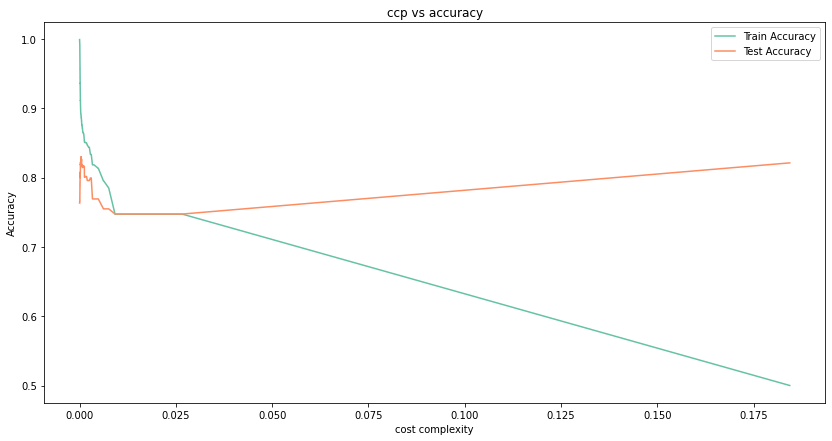

In [157]:
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x=alphas, label='Train Accuracy')
sns.lineplot(y=accuracy_test, x=alphas, label='Test Accuracy')
#plt.xticks(ticks=np.arange(0, 0.5 ,1))
plt.xlabel('cost complexity') # Label x-axis
plt.ylabel('Accuracy') # Label y-axis
plt.title("ccp vs accuracy")
plt.show()

#Best accuracy occurs between 0.001 and 0.005

In [174]:
# Modeling Using Decision Trees
tree2=DecisionTreeClassifier(ccp_alpha=0.025, random_state=0)
tree2.fit(X_train_balanced, Y_train_balanced)
pred=tree2.predict(X_test)
print(accuracy_score(y_test, pred))
#Accuracy has increased in predicting test set after implementing cost complexity

0.7473460721868365


In [175]:
'''Model Evaluation metrics of Decision Tree after hypertuning with ccp'''
print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
print('Precision Score : ' + str(precision_score(y_test,pred)))
print('Recall Score : ' + str(recall_score(y_test,pred)))
print('F1 Score : ' + str(f1_score(y_test,pred)))
#Decision Tree Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred)))
print('AUC : ' + str(metrics.auc(fpr, tpr)))

Accuracy Score : 0.7473460721868365
Precision Score : 0.37828371278458844
Recall Score : 0.6409495548961425
F1 Score : 0.47577092511013214
Confusion Matrix : 
[[1192  355]
 [ 121  216]]
AUC : 0.7057365744745742


In [160]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
metrics.auc(fpr, tpr)
print('AUC : ' + str(metrics.auc(fpr, tpr)))

AUC : 0.7057365744745742


In [161]:
#Calculating metrics
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1547
           1       0.38      0.64      0.48       337

    accuracy                           0.75      1884
   macro avg       0.64      0.71      0.65      1884
weighted avg       0.81      0.75      0.77      1884



In [172]:
data_feature_names=['city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'gender_Female',
       'gender_Male', 'gender_Other', 'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM']

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
%matplotlib inline 
import collections
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
dot_data = StringIO()
filename = "classification_tree.png" 
featureNames = X
#targetNames = y.unique().tolist()
out=tree.export_graphviz(tree2,feature_names=data_feature_names, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200,200))
plt.imshow(img,interpolation='nearest')
plt.savefig('name.png')
#files.download('name.png')

For the sake of profiling these candidates and see what features play an important role in differentiating these candidates, increasing max depth to 5

In [184]:
tree3=DecisionTreeClassifier( random_state=0, max_depth=5)
tree3.fit(X_train_balanced, Y_train_balanced)
pred=tree3.predict(X_test)
print(accuracy_score(y_test, pred))

0.779723991507431


In [185]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
print('Precision Score : ' + str(precision_score(y_test,pred)))
print('Recall Score : ' + str(recall_score(y_test,pred)))
print('F1 Score : ' + str(f1_score(y_test,pred)))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,pred)))

Accuracy Score : 0.779723991507431
Precision Score : 0.413716814159292
Recall Score : 0.5548961424332344
F1 Score : 0.4740177439797212
Confusion Matrix : 
[[1282  265]
 [ 150  187]]


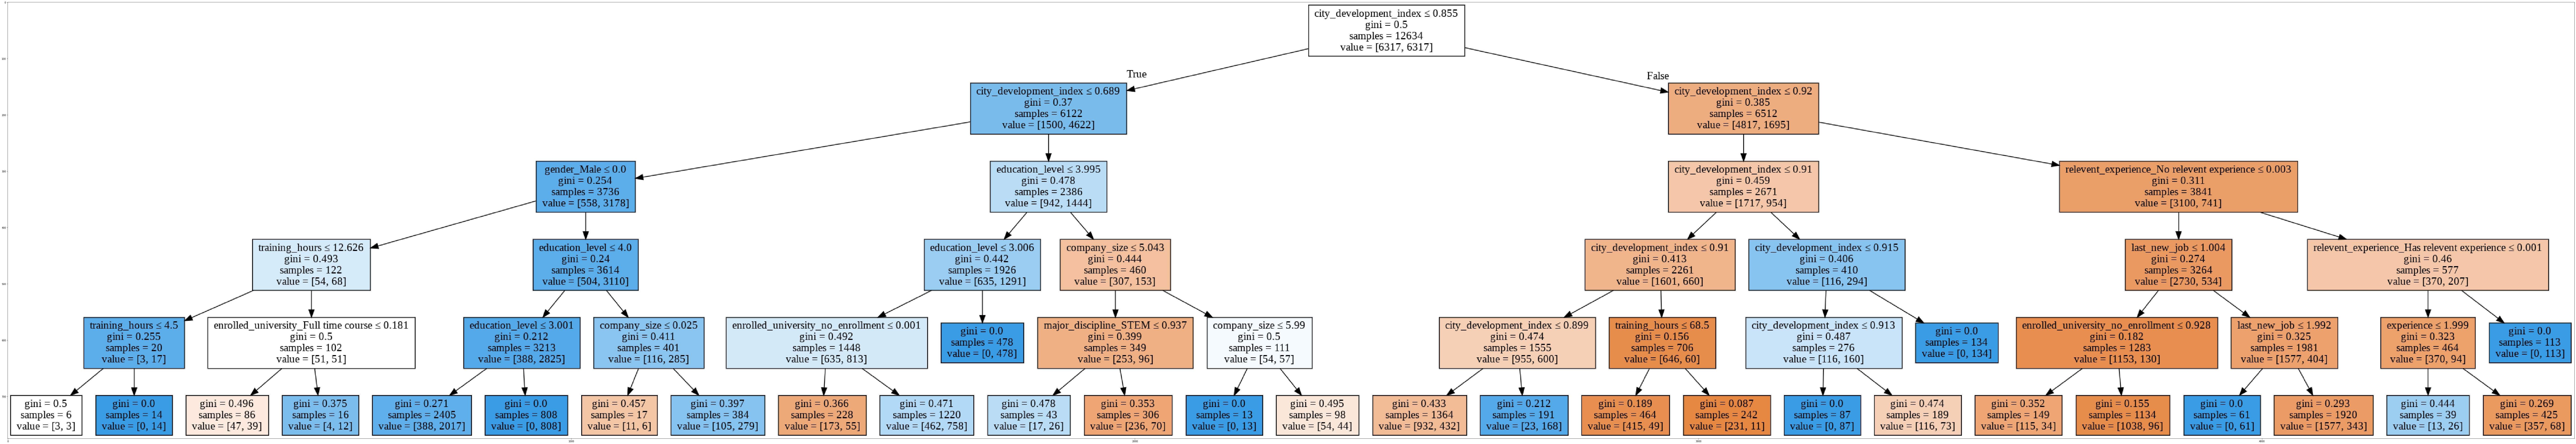

In [186]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
%matplotlib inline 
import collections
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
dot_data = StringIO()
filename = "classification_tree.png" 
featureNames = X
#targetNames = y.unique().tolist()
out=tree.export_graphviz(tree3,feature_names=data_feature_names, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200,200))
plt.imshow(img,interpolation='nearest')
plt.savefig('name.png')
#files.download('name.png')

After City Development Index, Relevent Experience, Gender and Education level play an important role in classifying these candidates as initial splits happened on these 4 features

# Random Forests

In [187]:
re=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
# Fitting the model
re.fit(X_train_balanced, Y_train_balanced)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
# Predicting Values
y_hat=re.predict(X_test)

In [190]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_hat)
metrics.auc(fpr, tpr)
print('AUC : ' + str(metrics.auc(fpr, tpr)))

AUC : 0.6974128158453521


In [191]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_hat)))
print('Precision Score : ' + str(precision_score(y_test,y_hat)))
print('Recall Score : ' + str(recall_score(y_test,y_hat)))
print('F1 Score : ' + str(f1_score(y_test,y_hat)))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_hat)))
print('AUC : ' + str(metrics.auc(fpr, tpr)))

Accuracy Score : 0.8232484076433121
Precision Score : 0.5059880239520959
Recall Score : 0.5014836795252225
F1 Score : 0.503725782414307
Confusion Matrix : 
[[1382  165]
 [ 168  169]]
AUC : 0.6974128158453521


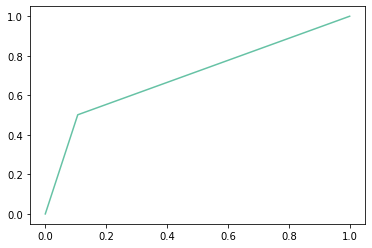

In [192]:
plt.plot(fpr, tpr)

[]

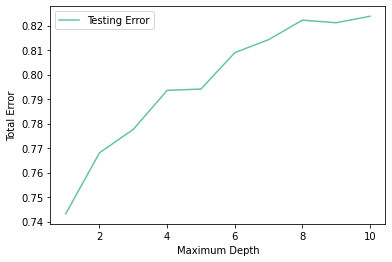

In [193]:
import numpy as np
import matplotlib.pyplot as plt

max_depth_list = [1,2,3,4,5,6,7,8,9,10]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    rf = RandomForestClassifier(max_depth=x) 
    rf.fit(X_train_balanced,Y_train_balanced)
    train_z = rf.predict(X_train_balanced)
    test_z = rf.predict(X_test)
    #train_errors.append(accuracy_score(X_train_balanced, train_z))
    test_errors.append(accuracy_score(y_test, test_z))
x = np.arange(len(max_depth_list)) + 1 # Create domain for plot
 # Plot training error over domain
plt.plot(x, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.plot() # Show graph

In [194]:
rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [197]:
# Hypertuning Max_depth
rfc.fit(X_train_balanced, Y_train_balanced)
y_hat1=rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [198]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_hat1)))
print('Precision Score : ' + str(precision_score(y_test,y_hat1)))
print('Recall Score : ' + str(recall_score(y_test,y_hat1)))
print('F1 Score : ' + str(f1_score(y_test,y_hat1)))

from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_hat1)))
print('AUC : ' + str(metrics.auc(fpr, tpr)))

Accuracy Score : 0.7754777070063694
Precision Score : 0.41365461847389556
Recall Score : 0.6112759643916914
F1 Score : 0.4934131736526946
Confusion Matrix : 
[[1255  292]
 [ 131  206]]
AUC : 0.6974128158453521


0.7112617701725749


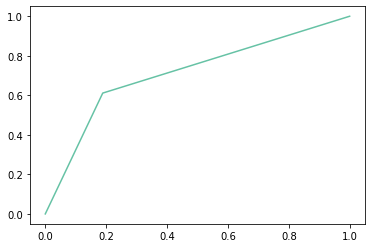

In [199]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_hat1)
print(metrics.auc(fpr, tpr))
plt.plot(fpr, tpr)

In [200]:
# Using GridSearch
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
n_estimators = [100]
max_depth = [3, 5, 8]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc, hyperF, cv = 3, verbose = 0, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_balanced, Y_train_balanced)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


In [201]:
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))
means = bestF.cv_results_['mean_test_score']
stds = bestF.cv_results_['std_test_score']
params = bestF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.848116 using {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.788116 (0.037983) with: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.779013 (0.033537) with: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.785662 (0.038605) with: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.786770 (0.037299) with: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 100}
0.788591 (0.038685) with: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 100, 'n_estimators': 100}
0.787245 (0.037759) with: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.780596 (0.036157) with: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.789778 (0.038778) with: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0

In [202]:
#Based on gridsearch
rfc1=RandomForestClassifier(bootstrap=True,max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500) 

In [203]:
rfc1.fit(X_train_balanced, Y_train_balanced)
y_hat2=rfc1.predict(X_test)

In [204]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_hat2)))
print('Precision Score : ' + str(precision_score(y_test,y_hat2)))
print('Recall Score : ' + str(recall_score(y_test,y_hat2)))
print('F1 Score : ' + str(f1_score(y_test,y_hat2)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_hat2)))
#print('AUC : ' + str(metrics.auc(fpr, tpr)))

Accuracy Score : 0.7786624203821656
Precision Score : 0.4190283400809717
Recall Score : 0.6142433234421365
F1 Score : 0.49819494584837554
Confusion Matrix : 
[[1260  287]
 [ 130  207]]


# Logistic Regression

In [208]:
# Converting m dummies to m-1 dummies to prevent multicollinearity
X=feautures
del X['gender_Other']
del X['enrolled_university_no_enrollment']
del X['relevent_experience_Has relevent experience']
del X['major_discipline_Other']

In [209]:
num_cols

['city_development_index', 'experience', 'last_new_job', 'training_hours']

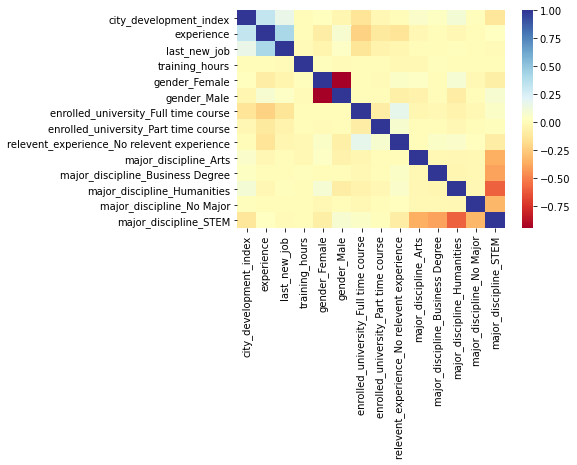

In [219]:
x=X[['city_development_index', 'education_level', 'experience',
       'company_size', 'last_new_job', 'training_hours', 'gender_Female',
       'gender_Male', 'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'relevent_experience_No relevent experience', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_STEM']].corr()
ax = sns.heatmap(x, cmap="RdYlBu")
# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=100)
plt.show(30,30)

In [220]:
#Standardising the numeric variables except categorical and dummy variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])
X.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,enrolled_university_Full time course,enrolled_university_Part time course,relevent_experience_No relevent experience,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_STEM
1,-0.586603,3,0.536140,2.0,1.621410,-0.300505,0,1,0,0,1,0,0,0,0,1
4,-0.664136,4,1.453388,2.0,1.018876,-0.947640,0,1,0,0,0,0,0,0,0,1
7,-0.707210,3,0.230391,0.0,1.621410,-0.781708,0,1,0,0,0,0,0,0,0,1
8,0.653928,3,-0.686856,2.0,-0.788727,-0.317098,0,1,0,0,0,0,0,0,0,1
11,0.653928,3,-0.992605,6.0,-0.788727,0.711680,0,1,0,0,0,0,0,0,0,1


In [221]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
smote = SMOTE()
# Using Over-sampling Technique - one of the most commonly used resampling 
# techniques to solve the imbalance problem.
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [224]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1", C=1e42, solver='liblinear')
lr.fit(X_train_balanced, Y_train_balanced)
print('intercept ', lr.intercept_[0])
coef=pd.DataFrame({'coeff': (lr.coef_[0])}, index=X.columns)
coef.sort_values(by='coeff', ascending=True)

intercept  -1.3271578259344072


,coeff
city_development_index,-0.847242
enrolled_university_Part time course,-0.609973
experience,-0.324179
gender_Female,-0.146073
education_level,-0.134611
gender_Male,-0.101617
training_hours,-0.054076
company_size,0.056517
last_new_job,0.148295
enrolled_university_Full time course,0.171042


In [ ]:
# Candidates with more experience are less likely to leave
# STEM, Humanities are more likely to leave
# Females are more likely to leave compared to males
# Candidates enrolled in full time are more likely to quit

In [225]:
y_hat = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)
lr_proba

array([[0.75822043, 0.24177957],
       [0.14879364, 0.85120636],
       [0.23335851, 0.76664149],
       ...,
       [0.52506013, 0.47493987],
       [0.19915352, 0.80084648],
       [0.67433983, 0.32566017]])

In [226]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_hat)))
print('Precision Score : ' + str(precision_score(y_test,y_hat)))
print('Recall Score : ' + str(recall_score(y_test,y_hat)))
print('F1 Score : ' + str(f1_score(y_test,y_hat)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_hat)))

Accuracy Score : 0.7749469214437368
Precision Score : 0.41282565130260523
Recall Score : 0.6112759643916914
F1 Score : 0.4928229665071771
Confusion Matrix : 
[[1254  293]
 [ 131  206]]


In [228]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 61.12759643916914%


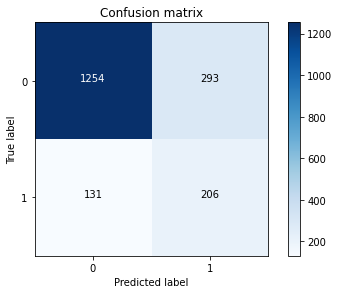

In [229]:
cnf_matrix = confusion_matrix(y_test, y_hat)
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [230]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_hat)
metrics.auc(fpr, tpr)

0.7109385639670157

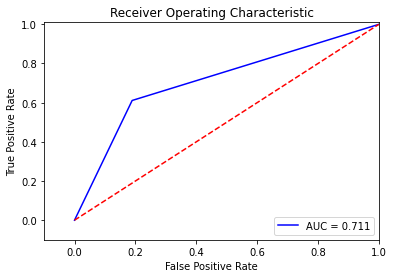

In [235]:
roc_auc=roc_auc_score(y_test, y_hat)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [236]:
# Using Stats model to identify important features (profiling)
import statsmodels.api as sm
X_train_balanced=pd.DataFrame(X_train_balanced)
X_train_balanced=X_train_balanced.rename(columns={0: 'city_development_index', 1: 'education_level', 2:'experience',
       3:'company_size', 4:'last_new_job', 5:'training_hours', 6:'gender_Female',
       7:'gender_Male', 8:'enrolled_university_Full time course',
       9:'enrolled_university_Part time course',
       10:'relevent_experience_No relevent experience', 11:'major_discipline_Arts',
       12:'major_discipline_Business Degree', 13:'major_discipline_Humanities',
      14: 'major_discipline_No Major', 15:'major_discipline_STEM'})
log_reg = sm.Logit(Y_train_balanced, X_train_balanced).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.558132
         Iterations 6


In [237]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                12634
Model:                          Logit   Df Residuals:                    12618
Method:                           MLE   Df Model:                           15
Date:                Thu, 27 May 2021   Pseudo R-squ.:                  0.1948
Time:                        06:44:48   Log-Likelihood:                -7051.4
converged:                       True   LL-Null:                       -8757.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
city_development_index                        -0.8486      0.020    -41.705      0.000      -0.888      -0.809
education_level                    

In [238]:
# Altering cut-off value to classify better
# changing cut off value from default to
prob1=lr.predict_proba(X_test)[:,1]
predicted=[1 if i > 0.4 else 0 for i in prob1]
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,predicted)))
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted)
metrics.auc(fpr, tpr)

Confusion Matrix : 
[[1100  447]
 [ 105  232]]


0.6997404759666934

In [240]:
print('Accuracy Score : ' + str(accuracy_score(y_test,predicted)))
print('Precision Score : ' + str(precision_score(y_test,predicted)))
print('Recall Score : ' + str(recall_score(y_test,predicted)))
print('F1 Score : ' + str(f1_score(y_test,predicted)))

Accuracy Score : 0.7070063694267515
Precision Score : 0.34167893961708395
Recall Score : 0.6884272997032641
F1 Score : 0.4566929133858268


As mentioned earlier,  the class distribution is skewed in this data set. Hence, the accuracy metric is biased and not preferable. Hence, primarily looked at the recall rates of different models to evaluate the performance. 

Comparing the recall rates of models, almost all the models performed similarly but good classification and quantification of the predictors were obtained from Logistic Regression Model. Coming to the profiling, both the import features from decision trees and logistic regression point to city development index and relevant experience. However, this information was more interpretable in logistic regression summary than in trees.

### Conclusion
As a result of this analysis, I have come to know that Candidates coming from cities with lesser development indexes are more likely to find new employment. Experience plays an important role in classifying these candidates. Candidates that either have relevant experience or experience at a previous company or overall experience above 5 years are less probable to leave. Candidates that have a major discipline in the STEM field are more likely to leave than other disciplines. Education plays a moderately important role in classifying candidates.